# Examples

Let's figure out how to perform k-fold cross validation. For this, we will use the university acceptance dataset from Monday again. If you need to download it again, do so at this [link](https://drive.google.com/open?id=13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d)

We will first start by creating a multivariate model, and assessing it's accuracy.

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#load the data
data = pd.read_csv('uni_admission.csv')

# We will use 4 independent variables for this
X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), "\n")

Mean Absolute Error: 0.05691472219785115
Mean Squared Error: 0.005725926473228667
Root Mean Squared Error: 0.07566985181185878 



In [12]:
# Reshaping our dataframe
#
n_data = data.stack()
n_data.head()

0  Serial No.      1.0
   GRE           337.0
   TOEFL         118.0
   uni_rating      4.0
   SOP             4.5
dtype: float64

Running the code above should yield an RMSE of ~ 0.0756. Let's now cross validate our model by using k-fold cross validation. We will use 5 folds for this example, and follow the documentation from [sklearn](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [13]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.11384971151782917

Training model 2
Model 2 Root Mean Squared Error: 0.06279391885787508

Training model 3
Model 3 Root Mean Squared Error: 0.05049941911260594

Training model 4
Model 4 Root Mean Squared Error: 0.06680059377472879

Training model 5
Model 5 Root Mean Squared Error: 0.05995110606834264


As you can tell from running the code, the RMSE value for our first model is fairly larger than the RMSE we found initially, and that of the other models. This would beg for an analysis of the specific indeces used. Perhaps most of the dataset's outliers were in the test set of model 1? as a challenge, perform a comparative analysis of the subset of the data used to test model 1 in comparison with the dataset as a whole.

Another useful observation is comparing the average RMSE value of all these models to the one we obtain in our initial approache. We created the array RMSES to gather all the RMSE values, we can compute the average simply as follows

In [14]:
np.mean(RMSES)

0.07077894986627632

As you can see, the average is fairly close to our initial value. However in this case, it might be worthwile to pick model 3 instead. 

Let's now highlight some variants of k-folds. A popular variant is called the leave one out cross validation, where the test data is just a single observation from your set. For a dataset of size **n**, this is the same as using kfold to create **n** folds. 


In [15]:
from sklearn.model_selection import LeaveOneOut

# We will use the same 4 independent variables for this
X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models\n' )
print(f"Mean RMSES: {np.mean(RMSES)}")

we are using 500 folds
trained 500 models

Mean RMSES: 0.052094961294479325


In this scenario it is also helpful to plot out the RMSE values across all models:

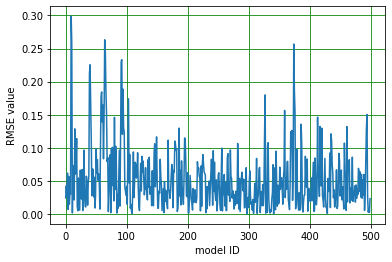

In [16]:
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.grid(color='green')
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

All in all, this indicates to us that it would be challenging to create a model that beats the ~0.05 average RMSE using this dataset. This is the benefit of using Leave One Out Cross validation: It gives us a sense of how best we can expect a given model to be using our dataset. Note however that this can be an extremely time consuming process for large datasets.

# Challenge 1

Revisit yesterday's challenge on wine quality, and use k-folds cross validation with 10 folds. Was your model good enough? Could you find a better performing model?

([Dataset link here](https://colab.research.google.com/drive/1IKt0hW3aWrKNwB0xxOQGjjWC8h3t_G8Q?authuser=1#scrollTo=-erZrimA8qNm))

In [17]:

# Loading our dataset
#
wine = pd.read_csv("winequality-red.csv")
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
from sklearn.model_selection import KFold

X = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',\
          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',\
          'pH', 'sulphates', 'alcohol']].values
y = wine['quality'].values

folds = KFold(n_splits=10)

# Get number of folds
#
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# Keeping track of the RMSE
RMSES = []
count = 1

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))

  # set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Fit our model
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)

  # Predict and Check accuracy of the model
  y_pred = regressor.predict(X_test)

  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)

  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 0.6862481195221853

Training model 2
Model 2 Root Mean Squared Error: 0.6324703434524646

Training model 3
Model 3 Root Mean Squared Error: 0.6850468988873284

Training model 4
Model 4 Root Mean Squared Error: 0.6570566965861605

Training model 5
Model 5 Root Mean Squared Error: 0.6137235391805054

Training model 6
Model 6 Root Mean Squared Error: 0.7236010030500887

Training model 7
Model 7 Root Mean Squared Error: 0.632819730557344

Training model 8
Model 8 Root Mean Squared Error: 0.6553239884798194

Training model 9
Model 9 Root Mean Squared Error: 0.6014941518907087

Training model 10
Model 10 Root Mean Squared Error: 0.698513075772105


# Challenge 2
Another common variant of kfold is repeated kfold cross validation. This means that the folding and training processes get repeated several times, shuffling the dataset at each instance.

Read up n how to perform repeated kfold [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html#sklearn.model_selection.RepeatedKFold) 
 
Then, create a model to predict university admission again, this time using all independent varible, and krepeated kfold of your choice. Can you improve on the results without cross validation? Can you improve on the results from the Leave One Out cross validation?



In [21]:
from sklearn.model_selection import RepeatedKFold

X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

for train_index, test_index in rkf.split(X):
  print("Train:", train_index, "\nTest:", test_index)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Fit our model
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)

  # Predict and Check accuracy of the model
  y_pred = regressor.predict(X_test)

  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)

  count += 1

print('trained ' +str(count) + ' models\n')
print(f"Mean RMSES: {np.mean(RMSES)}")


Train: [  0   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18  19
  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39
  40  41  42  43  44  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  77  78
  79  80  81  82  83  84  85  86  87  88  89  91  92  93  94  95  97  98
  99 100 101 103 104 105 106 107 109 110 111 112 113 114 115 116 117 119
 120 121 122 123 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 155 156 157 158
 160 161 162 163 164 165 166 167 168 169 170 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 192 193 194 195 196 197
 198 199 200 201 202 203 204 206 207 208 209 210 211 212 214 215 216 217
 218 219 220 222 223 224 225 226 227 228 229 230 231 232 234 235 236 237
 239 242 243 244 245 246 247 248 249 251 252 253 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271

In [0]:
from sklearn.model_selection import LeaveOneOut

X = data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y = data['admit_chance'].values

folds = LeaveOneOut()

# Get number of folds
#
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# Keeping track of the RMSE
RMSES = []
count = 0

for train_index, test_index in folds.split(X):

   # set up the train and test based on the split determined by KFold
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

   # Fit our model
   regressor = LinearRegression()
   regressor.fit(X_train, y_train)

   # Predict and Check accuracy of the model
   y_pred = regressor.predict(X_test)

   rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
   RMSES.append(rmse_value)

   count += 1

print('trained ' +str(count) + ' models\n')
print(f"Mean RMSES: {np.mean(RMSES)}")